In [1]:
import yfinance as yf
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt



/var/folders/yl/gn9fldpj69169vhn466y4klh0000gn/T/ipykernel_70180/2081579182.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df=yf.download(ticker,start='2000-01-01')
[*********************100%***********************]  1 of 1 completed


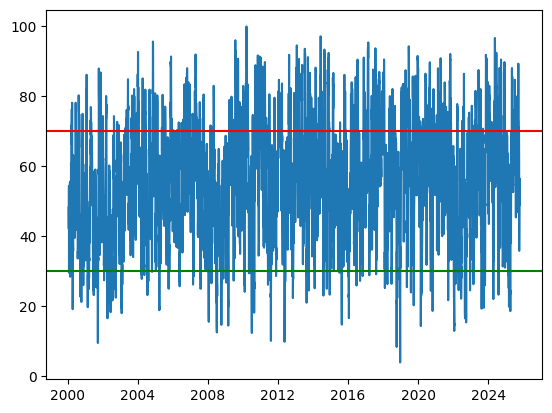

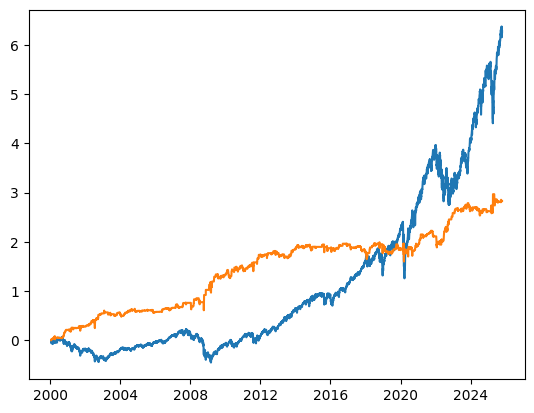

In [ ]:
TICKER = 'SPY'
RSI_LENGTH = 14
OVERBOUGHT = 70
OVERSOLD = 30
LOOKBACK = 10000

def get_data(ticker=TICKER):
    df=yf.download(ticker,start='2000-01-01')
    df.columns = df.columns.get_level_values(0)
    
    #only return the usbset of data interested in
    return df.iloc[-LOOKBACK:,:]

def add_RSI(df, length=RSI_LENGTH):
    price_change = df['Close'].diff()
    
    #separate gains/losses
    gain = price_change.where(price_change > 0,0)
    loss = -price_change.where(price_change < 0,0)
    #average gain vs loss
    avg_gain = gain.rolling(window=length).mean()
    avg_loss = loss.rolling(window=length).mean()
    
    #calculate rsi
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    
    df['RSI'] = rsi
    
    #plot the relative strength index
    plt.plot(df['RSI'])
    plt.axhline(OVERBOUGHT, color = 'red')
    plt.axhline(OVERSOLD, color ='green')
    return df.dropna()

def add_strategy(df, overbought = OVERBOUGHT, oversold = OVERSOLD):
    df['Strategy'] = 0
    df['Strategy'] = np.where(df['RSI'] > overbought, -1,
                     np.where(df['RSI'] < oversold, 1, 0))
    df['Strategy'] = df['Strategy'].shift(1)
    return df

def test_strategy(df):
    df['Asset_Returns'] = (1 + df['Close'].pct_change()).cumprod() - 1
    df['Strategy_Returns'] = (1 + df['Close'].pct_change() * df['Strategy']).cumprod() -1
    
    plt.figure()
    plt.plot(df['Asset_Returns'])
    plt.plot(df['Strategy_Returns'])
    return df

def main():
    df = get_data(TICKER)
    df = add_RSI(df)
    df = add_strategy(df)
    df = test_strategy(df)
    
    return df

df=main() 

In [20]:
df['Strategy'].value_counts()

Strategy
 0.0    317
-1.0    104
 1.0     16
Name: count, dtype: int64

In [23]:
df

Price,Close,High,Low,Open,Volume,RSI,Strategy,Asset_Returns,Strategy_Returns
Date,,,,,,,,,
2024-01-22,473.181030,474.913423,472.525249,473.729133,75844900,66.780709,NaN,NaN,NaN
2024-01-23,474.561005,474.805694,472.632878,473.729084,49945300,68.175080,0.0,0.002916,0.000000
2024-01-24,475.079773,478.387953,474.580596,477.448353,81765000,77.429157,0.0,0.004013,0.000000
2024-01-25,477.663727,477.937778,475.079819,477.223273,72525000,83.052127,-1.0,0.009474,-0.005439
2024-01-26,477.056885,478.730554,476.205369,477.233054,76641600,81.064853,-1.0,0.008191,-0.004175
...,...,...,...,...,...,...,...,...,...
2025-10-13,663.039978,665.130005,659.770020,660.650024,79560500,49.846336,0.0,0.401240,0.041332
2025-10-14,662.229980,665.830017,653.169983,657.169983,88779600,51.045724,0.0,0.399528,0.041332
2025-10-15,665.169983,670.229980,658.929993,666.820007,81702600,56.602394,0.0,0.405741,0.041332


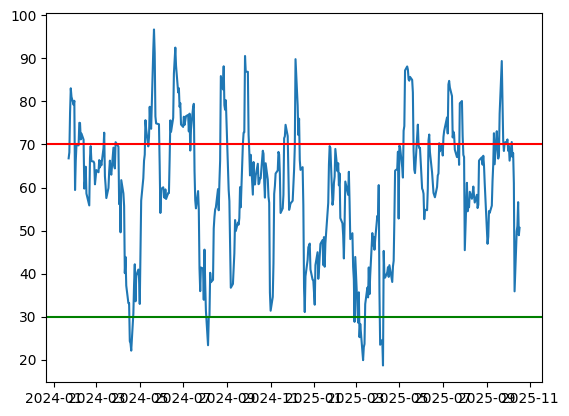

In [13]:
plt.plot(df['RSI'])
plt.axhline(OVERBOUGHT, color = 'red')
plt.axhline(OVERSOLD, color ='green')